# 银行客户信用风险评估项目报告

# 学生信息
        
*  学号：19200444
*  姓名： 薛辰玺
*  专业：人工智能
*  班级：2004

## 一、项目背景

### 1.1 项目背景

>信用风险是商业银行长期以来面临的主要风险。个人消费信贷业务在我国已经十分广泛，风险也随之而来，有许多个人消费信贷最后成为坏账，信贷审核往往是更具人工手动筛选的，由个人经验决定，没有确定指标，人员操作也可能产生失误，本项目希望利用机器学习对个人信贷违约风险进行具体的分析，建立稳定性高的模型，预测个人信贷违规风险。


### 1.2 项目目标 
>我们项目通过分析客户的个人基本信息、信用历史、消费与偿还能力等指标，利用机器学习建立个人信用风险评估模型，预测申请贷款的客户是否有违约风险，并输出决策结果，以便实际应用到放贷中。

## 二、客户数据探索与预处理 

### 2.1 数据集介绍 





**默认数据集有32个特征, 包含个人消费水平,提现金额,不良记录,是否违约等等.** 


离散列有  
|maritalStatus|education|idVerify|threeVerify|Han|netLength|sex|CityId|Default|  
连续列有  
|age|cashTotalAmt|cashTotalCnt|monthCardLargeAmt|onlineTransAmt|onlineTransCnt|publicPayAmt|publicPayCnt|transTotalAmt|transTotalCnt|transCnt_non_null_months|transAmt_mean|transAmt_non_null_months|cashCnt_mean|cashCnt_non_null_months|cashAmt_mean|cashAmt_non_null_months|card_age|


**连续列的统计信息，祥见[统计信息代码块](#1.2-查看数据基础统计信息)，下面是基本信息**
```
              age      card_age  cashAmt_mean   
mean     35.554091     24.921013   1471.660381   
std       8.194765     17.027043   2892.147589   
min      19.000000      0.000000      0.000000   
25%      29.000000     12.000000      0.000000   
50%      34.000000     22.000000    460.000000   
75%      41.000000     33.000000   1820.269817   
max      62.000000     86.000000  72633.333330   

        cashAmt_non_null_months  cashCnt_mean  cashCnt_non_null_months
mean                   2.114118      1.188909                 2.125927   
std                    2.597253      1.364354                 2.605969   
min                    0.000000      0.000000                 0.000000   
25%                    0.000000      0.000000                 0.000000   
50%                    1.000000      1.000000                 1.000000   
75%                    3.000000      1.937867                 3.000000   
max                   12.000000     29.333333                12.000000   

         cashTotalAmt  cashTotalCnt 
mean      6109.367535      5.212286 
std      18030.553996      9.762175 
min          0.000000      0.000000 
25%          0.000000      0.000000 
50%        500.000000      1.000000  
75%       4991.000000      6.000000 
max     611900.000000    194.000000 

        monthCardLargeAmt  noTransWeekPre  onlineTransAmt
mean         1.837146e+04   0.689815   -6.095907e+04   
std          6.757461e+04   0.313747    4.405242e+05   
min          0.000000e+00   0.000000   -1.267650e+07   
25%          9.500000e+01   0.507253   -5.689320e+03   
50%          3.114000e+03   0.810000    0.000000e+00   
75%          1.443000e+04   0.949573    9.957696e+02   
max          4.737770e+06   2.000000    2.464593e+07   

        onlineTransCnt  publicPayAmt  publicPayCnt 
mean         35.418848  5.374214e+02      7.538703 
std          97.796546  9.382638e+04     25.851716 
min           0.000000 -6.034950e+06      0.000000  
25%           0.000000  0.000000e+00      0.000000  
50%           5.000000  0.000000e+00      1.000000  
75%          32.000000  1.550000e+03      5.927933 
max        6792.000000  2.944920e+06   1317.000000 

        transAmt_mean  transAmt_non_null_months  transCnt_mean 
mean     5.595396e+03                  5.567252       2.416798   
std      2.423760e+04                  3.982459       8.672935   
min      0.000000e+00                  0.000000       0.000000   
25%      5.802094e+01                  2.000000       0.417147   
50%      8.166727e+02                  5.000000       1.214969   
75%      3.886922e+03                  9.000000       2.641152   
max      2.122952e+06                 12.000000    1131.000000   

        transCnt_non_null_months  transTotalAmt  transTotalCnt
mean                    5.569787   4.611167e+04      19.978326
std                     3.904637   2.355576e+05      64.841233 
min                     0.000000   0.000000e+00       0.000000 
25%                     2.000000   4.100000e+01       1.000000  
50%                     5.000000   4.424000e+03       6.000000 
75%                     9.000000   2.660000e+04      17.000000 
max                    12.000000   2.547546e+07    6789.000000 


### 2.2 探索性数据分析 
\(1)  
客户违约数据分布图详见![违约总体占比柱状图](./1.png)  
**未违约客户量显著多于违约客户，但由于本次数据集足够大，训练时不会有显著性能影响。且经过验证，强行平衡两个类别反而会造成性能下降，可能是因为过采样造成无效数据和噪声增加，或是欠采样造成有效数据减少。**  

\(2)  
离散特征和客户违约数据分布图详见![不同城市级别违约率分布柱状图](2.png)  ![不同文化程度下违约率分布柱状图](3.png)  ![不同三要素验证下违约率分布柱状图](4.png)  ![不同婚姻状况下违约率分布柱状图](5.png)  ![不同在网时长下违约率分布柱状图](6.png)  
**这里可以看出，城市级别中一线城市的客户违约更少；学历分布下初中学历的客户违约最少，本科以上的违约最多；三要素验证里不一致的人违约更多；婚姻状况中已婚的违约更多；在网时长里超过24个月的违约最多。**  

\(3)  
客户年龄和开卡时长的直方图详见![年龄和开卡时长分布](9.png)  
**客户年龄中25-30岁的最多，开卡时长大多在20个月**  

\(4)  
**经过可视化分析，违约客户中，与一般人认为的不同的主要有：学历本科以上的人违约更多，在网时长更长的比新用户更容易违约。**  



### 2.3 数据预处理 
离散变量中idVerify缺失值最多，有25782个，maritalStatus次之，有7493，threeVerify、idVerify的缺失值在3000左右，sex163个，default仅2个。  
**Default缺失值比例很小，可以直接删除。sex、maritalStatus、threeVerify、idVerify和education字段，缺失数据占有一定的比重，进行缺失值填补。**  
至此，数据的缺失值全部被处理，检测显示没有缺失值  [缺失值检查与处理](#1.5.1-缺失值检查与处理)  

**连续变量中，消费字段有负数的数据，但经过查验并不是异常，属于入金，不操作。有消费数量为0但金额不为0的情况，进行置零。有消费金额远超正常量级的数据，推测不是个人消费，故删除。再次对连续变量绘制盒图，未发现需要处理的异常。**  

对于离散变量中变量仍然是中文的情况，应该进行数值编码，例如maritalStatus|education|idVerify|threeVerify|netLength|sex|CityId  
对于所有离散变量都应该进行one-hot编码来消除不必要的数值关系。  
**在项目中，先对上述离散特征数值编码，再对所有离散特征one-hot编码。**  

标准化：  
```
data[continuous_columns]=data[continuous_columns].apply(lambda x:(x-x.mean())/x.std())
```
离散化：  
```
data[continuous_columns]=data[continuous_columns].apply(lambda x:pd.qcut(x,5,duplicates='drop'))
data=pd.get_dummies(data)
```

> 要求：
（1）请简要分析一下字段缺失值的分布情况，你分别对哪些字段进行了哪些处理？有没有异常？文字介绍具体方法，并展示前后变化。
（2）请简要分析连续型特征中异常值的分布情况，结合业务场景，在项目中你分别进行了怎样的处理？
（3）请简要分析哪些特征需要进行数值编码与one-hot编码？如何操作？
（4）请对数据先进行标准化，再进行离散化，展示实现过程。
（5）文字内容不限于上述四点，可以根据自己的理解阐述更多内容。
        

## 三、建立信用评估指标体系 

数据集的字段过多，不便于我们评价，因此需要通过**建立指标体系来对不同的字段进行分类**，这也为下一步的建模工作做准备。
参照国际信用评分指标体系的建立方式，我们开始建立信用评估指标体系。指标体系分为**个人信息、信用历史、偿债能力、消费能力**四大指标类。此外也建立了一些新的指标，例如“不良记录”、“平均每笔取现金额”等等。  

      年消费总额=年消费笔数均值×年消费金额均值
      年取现总额=年取现笔数均值×年取现金额均值
      平均每笔取现金额=总取现金额/总取现笔数
      网上平均每笔消费额=网上消费金额/网上消费笔数
      公共事业平均每笔缴费额=公共事业缴费金额/公共事业缴费笔数
      不良记录=法院失信传唤记录+有无逾期记录+有无犯罪记录+黑名单接口记录不良记录

**经过后期建模与评价，可以观察到个人信息和信用历史对模型影响不大，*偿债能力、消费能力* 对模型影响较大。**  
>详细分析：排名前十的是cashTotalCnt,onlineTransCnt,total_withdraw,noTransWeekPre,transCnt,cashCnt,transAmt的独热编码值，主要是取现、在线消费的金额和次数，且较少的靠前，说明偿债能力、消费能力低的客户更容易违约。排序可视化如下图。  

>z-score归一化排序![](FI1.png)  
>minmax归一化排序![](FI2.png)


## 四、风控模型的构建与效果评估 

### 4.1 风控模型的构建 
使用分层采样的方法，按照8:2将客户数据集随机划分为训练集与测试集。  
使用逻辑回归、随机森林等多种算法分别构建风控模型。  
使用正则化、网格搜索和交叉验证等方式对模型参数进行调优。  
经过训练，发现可见对模型进行多方面超参数优化的提升不大，表现为准确率有所下降、泛用性有所上升。  
因此推测可能需要对数据本身进行再次处理。  
最好的逻辑回归模型**ACC 0.961656279708461, AUC 0.9068804710608634**  
最好的随机森林模型**ACC 0.9760219710573571， AUC 0.9180025520251995**  
此外，最好的支持向量机和神经网络也能达到相近的性能。  
注：标准支持向量机算法是分类而不是回归，这里支持向量机的概率利用platt缩放进行校准，但会显著加大训练时间。  
    


### 4.2 风控模型的效果评估 
本项目主要从准确性、稳定性和可解释性三个方面来评估模型。  
其中准确性指标包括感受性曲线下面积(ROC_AUC)和区分度指标(KS)。  
稳定性由稳定度指标(population stability index ,PSI)体现。  
可解释性由模型的特征重要性来体现。  
>逻辑回归的模型评估如下  
![](lrROC.png)  
逻辑回归的ROC下面积已经达到0.91，说明模型泛用性高。  
![](lrKS.png)  
逻辑回归的KS值是0.75  
![](lrPSI.png)  
逻辑回归的PSI累计很低，模型稳定性高  
![](lrFI.png)  
逻辑回归中最重要的两个指标是消费能力和偿债能力  


>随机森林的模型评估如下  
![](rfROC.png)  
随机森林的ROC下面积已经达到0.93，说明模型泛用性高。  
![](rfKS.png)  
随机森林的KS值是0.80  
![](rfPSI.png)  
随机森林的PSI大部分情况很好，在0.9-1.0时略有升高  
![](rfFI.png)  
随机森林中最重要的两个指标也是消费能力和偿债能力，且无消费的权重显著高于其他。  





## 五、项目总结与心得体会 

### 5.1 项目总结

#### 项目目标：建立个人信用风险评估模型，预测申请贷款的客户是否有违约风险，并输出决策结果。

#### 项目流程：数据分析与预处理、模型建立与参数优化

#### 数据处理方法：对项目数据首先进行了可视化分析，再对缺失值和异常值进行处理，然后对离散列进行数值填充和独热编码，此外，在模型建立过程中，再次对连续数据进行离散化和独热编码，有效提升了模型性能。

#### 风控模型构建方法：本项目使用逻辑回归，随机森林，支持向量机，神经网络，并对模型进行优化调参，最终模型的准确率和泛用性都达到了优秀的标准。

#### 效果分析：从准确性、稳定性和可解释性，也即感受性曲线下面积与区分度指标，稳定度指标，特征重要性来体现模型的效果。

#### 初步结论：本项目基于机器学习，成功建立了个人信用风险评估模型，且泛用性和准确性都十分优秀，能够有效预测客户违约的风险，具有一定实用价值。本项目也发现，客户违约的可能性更多取决于他的消费能力和偿债能力，与客户是否有不良记录或者客户身份关联性较低，因此本项目可以有效消除人工审核时经验产生的对客户本身的偏见，从数据中更准确判断客户违约的可能性。

### 5.2 心得体会
**问题**  
```
数据集缺失值无法读出：
观察源文件，发现缺失值不是None或者NaN，而是字符串，因此手动将数据集缺失项设置为‘None’。
```
```
可视化过程中，中文无法显示：
手动导入中文字体并设置该字体。
```
```
对模型超参数优化后提升不显著：
推测可能是因为数据本身存在问题，不适合当前模型，因此对连续数据进行标准化和离散化，有效提高了模型性能。
```
```
计算精确度和感受性曲线下面积时报错：
分析可知精确度计算接收分类值，而auc计算接收概率值，因此需要预测分类值和概率值两种，并分别计算。
```
```
SVM预测概率时产生错误：
标准支持向量机仅适用于分类问题，需要在训练时更改超参数，以输出概率值。
```
```
多个模型的指标重要性合并数据结果没有很好体现指标重要性：
需要对多个指标重要性数据首先进行归一化后再加权合并。
```  
**收获**  
本项目基于机器学习，成功建立了个人信用风险评估模型，且泛用性和准确性都十分优秀。本项目通过实践让我进一步深化了机器学习的算法操作，包括数据预处理，模型建立和分析等等。  


**体会**  
学习了如何完成一个具有现实意义的机器学习项目，学习了如何找出问题，优化模型等等，懂得了实践在学习中的重要性。


# 六、完整项目代码整理


In [186]:
import warnings
warnings.filterwarnings("ignore")

## 1. 数据解析与预处理


### 1.1 读取数据

In [6]:
import pandas as pd
data = pd.read_table('dataset.txt',encoding='gbk',sep=' ',na_values=['None'])

### 1.2 查看数据基础统计信息

In [188]:
print(data.info())
data_des = data.describe(include='all')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
print(data_des)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47337 entries, 0 to 47336
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CityId                    47337 non-null  object 
 1   Han                       47337 non-null  int64  
 2   age                       47337 non-null  float64
 3   card_age                  47337 non-null  int64  
 4   cashAmt_mean              47337 non-null  float64
 5   cashAmt_non_null_months   47337 non-null  int64  
 6   cashCnt_mean              47337 non-null  float64
 7   cashCnt_non_null_months   47337 non-null  int64  
 8   cashTotalAmt              47337 non-null  int64  
 9   cashTotalCnt              47337 non-null  int64  
 10  education                 44323 non-null  object 
 11  idVerify                  21555 non-null  object 
 12  inCourt                   47337 non-null  int64  
 13  isBlackList               47337 non-null  int64  
 14  isCrim

### 1.3 是否违约分析以及不同特征取值的违约率可视化

#### 1.3.1 违约总体占比柱状图

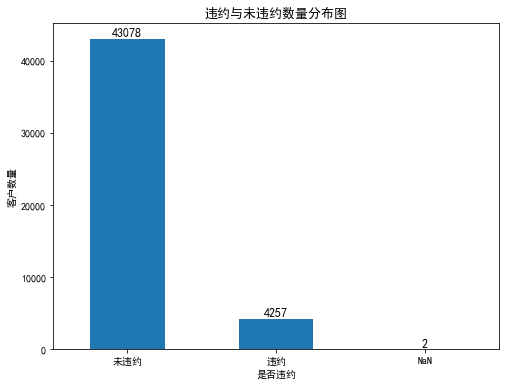

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
data.loc[data['Default'] == '0.0','Default'] = 0
counts = data['Default'].value_counts(dropna=False).values
for index, item in zip([0,1,2], counts): 
    plt.text(index, item, item, ha="center", va= "bottom", fontsize=12)
data['Default'].value_counts(dropna=False).plot(kind='bar',rot=0)
plt.xticks([0,1,2],['未违约','违约','NaN'])
plt.xlabel("是否违约")
plt.ylabel("客户数量")
plt.title("违约与未违约数量分布图",size=13)
plt.rcParams['font.sans-serif']=['SimHei'] 
plt.rcParams['font.family']=['sans-serif']
plt.show()

#### 1.3.2 不同城市级别违约率分布柱状图

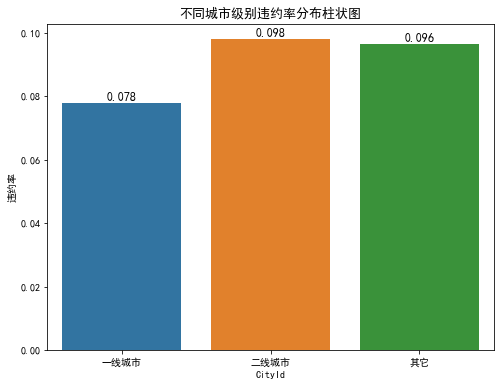

In [12]:
import seaborn as sns
fig = plt.figure(figsize=(8,6))
data['CityId'] = data['CityId'].astype('category')
data['CityId'] = data['CityId'].cat.set_categories(['一线城市', '二线城市', '其它'],ordered=True)
data.loc[data['Default'] == 'None','Default'] = 0
data[u"Default"] = pd.to_numeric( data[u"Default"])
cityid_rate = data.groupby('CityId')['Default'].sum() / data.groupby('CityId')['Default'].count()
for index, item in zip([0, 1, 2], cityid_rate):
    plt.text(index, item, '%.3f' % item, ha="center", va="bottom", fontsize=12)
sns.barplot(x=[0, 1, 2], y=cityid_rate)
plt.xticks([0,1,2],['一线城市', '二线城市', '其它'])
plt.xlabel("CityId")
plt.ylabel("违约率")
plt.title("不同城市级别违约率分布柱状图",fontsize=13)
plt.show()

#### 1.3.3 不同文化程度下违约率分布柱状图

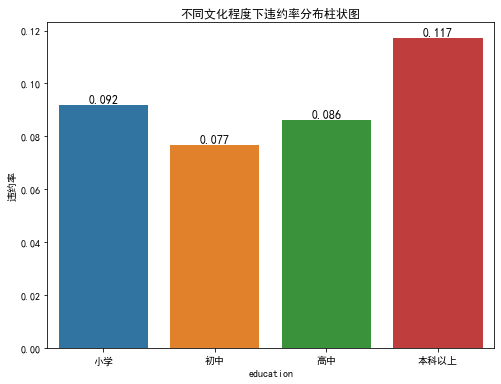

In [190]:
import seaborn as sns
fig = plt.figure(figsize=(8,6))
data.loc[data['Default'] == '0.0','Default'] = 0
data['education'] = data['education'].astype('category')
data['education'] = data['education'].cat.set_categories(['小学', '初中', '高中', '本科以上'],ordered=True)
data.loc[data['Default'] == 'None','Default'] = 0
data[u"Default"] = pd.to_numeric( data[u"Default"])
edu_rate = data.groupby('education')['Default'].sum() / data.groupby('education')['Default'].count()
# print(edu_rate)
for index, item in zip([0, 1, 2, 3], edu_rate):
    plt.text(index, item, '%.3f' % item, ha="center", va="bottom", fontsize=12)
sns.barplot(x=[0, 1, 2, 3], y=edu_rate)
plt.xticks([0,1,2,3],['小学', '初中', '高中', '本科以上'])
plt.xlabel("education")
plt.ylabel("违约率")
plt.title("不同文化程度下违约率分布柱状图")
plt.show()

#### 1.3.4 不同三要素验证下违约率分布柱状图

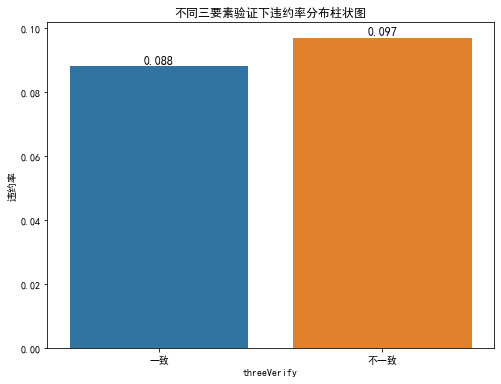

In [191]:
import seaborn as sns
fig = plt.figure(figsize=(8,6))
data.loc[data['Default'] == '0.0','Default'] = 0
data['threeVerify'] = data['threeVerify'].astype('category')
data['threeVerify'] = data['threeVerify'].cat.set_categories(['一致','不一致'],ordered=True)
data.loc[data['Default'] == 'None','Default'] = 0
data[u"Default"] = pd.to_numeric( data[u"Default"])
thV_rate = data.groupby('threeVerify')['Default'].sum() / data.groupby('threeVerify')['Default'].count()
# print(thV_rate)
for index, item in zip([0, 1], thV_rate):
    plt.text(index, item, '%.3f' % item, ha="center", va="bottom", fontsize=12)
sns.barplot(x=[0, 1], y=thV_rate)
plt.xticks([0,1],['一致','不一致'])
plt.xlabel("threeVerify")
plt.ylabel("违约率")
plt.title("不同三要素验证下违约率分布柱状图")
plt.show()

#### 1.3.5 不同婚姻状况下违约率分布柱状图

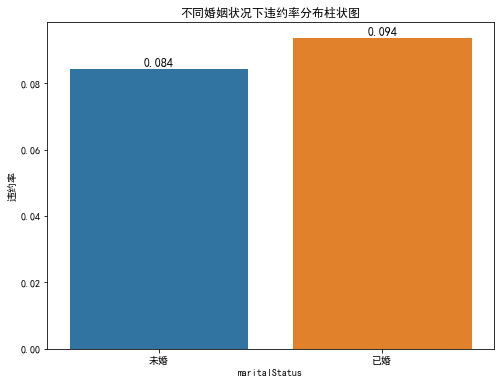

In [192]:
fig = plt.figure(figsize=(8,6))
data.loc[data['Default'] == '0.0','Default'] = 0
data['maritalStatus'] = data['maritalStatus'].astype('category')
data['maritalStatus'] = data['maritalStatus'].cat.set_categories(['未婚','已婚'],ordered=True)
data.loc[data['Default'] == 'None','Default'] = 0
data[u"Default"] = pd.to_numeric( data[u"Default"])
mrS_rate = data.groupby('maritalStatus')['Default'].sum() / data.groupby('maritalStatus')['Default'].count()
# print(mrS_rate)
for index, item in zip([0, 1], mrS_rate):
    plt.text(index, item, '%.3f' % item, ha="center", va="bottom", fontsize=12)
sns.barplot(x=[0, 1], y=mrS_rate)
plt.xticks([0,1],['未婚','已婚'])
plt.xlabel("maritalStatus")
plt.ylabel("违约率")
plt.title("不同婚姻状况下违约率分布柱状图")
plt.show()

#### 1.3.6 不同在网时长下违约率分布柱状图

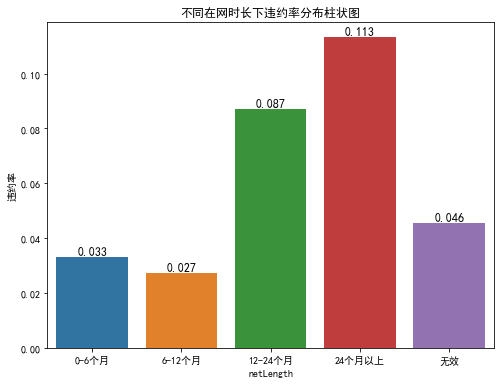

In [193]:
fig = plt.figure(figsize=(8,6))
data.loc[data['Default'] == '0.0','Default'] = 0
data['netLength'] = data['netLength'].astype('category')
data['netLength'] = data['netLength'].cat.set_categories(['0-6个月','6-12个月','12-24个月','24个月以上','无效'],ordered=True)
data.loc[data['Default'] == 'None','Default'] = 0
data[u"Default"] = pd.to_numeric( data[u"Default"])
ntL_rate = data.groupby('netLength')['Default'].sum() / data.groupby('netLength')['Default'].count()
# print(ntL_rate)
for index, item in zip([0, 1, 2, 3, 4], ntL_rate):
    plt.text(index, item, '%.3f' % item, ha="center", va="bottom", fontsize=12)
sns.barplot(x=[0,1,2,3,4], y=ntL_rate)
plt.xticks([0,1,2,3,4],['0-6个月','6-12个月','12-24个月','24个月以上','无效'])
plt.xlabel("netLength")
plt.ylabel("违约率")
plt.title("不同在网时长下违约率分布柱状图")
plt.show()

### 1.4 连续性特征分布及其相关性可视化

#### 1.4.1 总消费金额的核密度图 总消费笔数和总消费金额的回归关系图

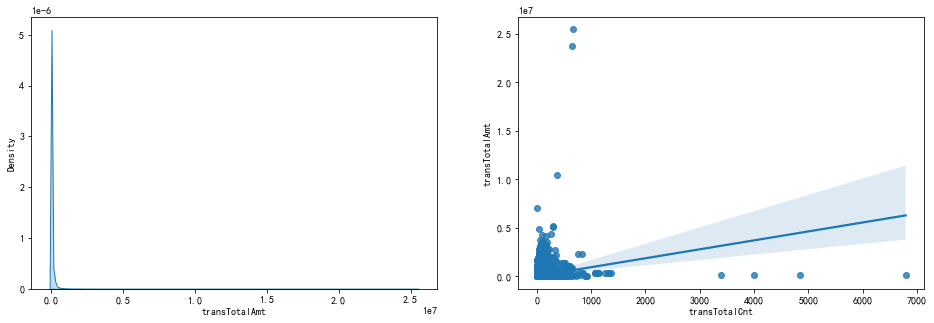

In [194]:
fig, [ax1,ax2] = plt.subplots(1, 2, figsize=(16, 5))
sns.kdeplot(data["transTotalAmt"],shade=True,ax=ax1)
sns.regplot(x="transTotalCnt",y="transTotalAmt",data=data,ax=ax2)
plt.rcParams['axes.unicode_minus']=False
plt.show()

#### 1.4.2 总取现金额的核密度图 总取现笔数和总取现金额的回归关系图

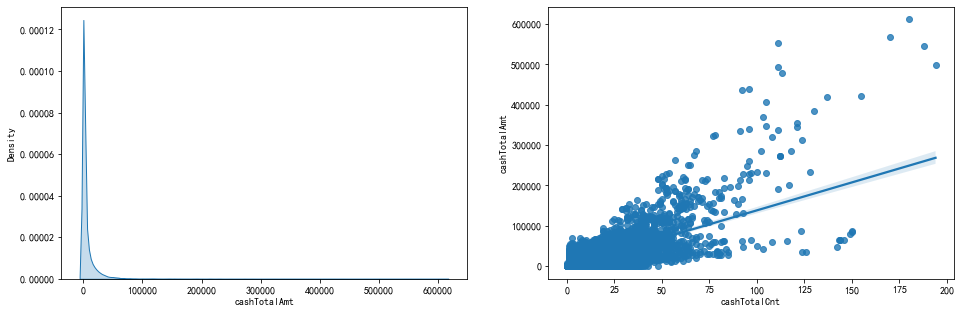

In [195]:
fig, [ax1,ax2] = plt.subplots(1, 2, figsize=(16, 5))
sns.kdeplot(data["cashTotalAmt"],shade=True,ax=ax1)
sns.regplot(x="cashTotalCnt",y="cashTotalAmt",data=data,ax=ax2)
plt.show()

#### 1.4.3 年龄和开卡时长分布

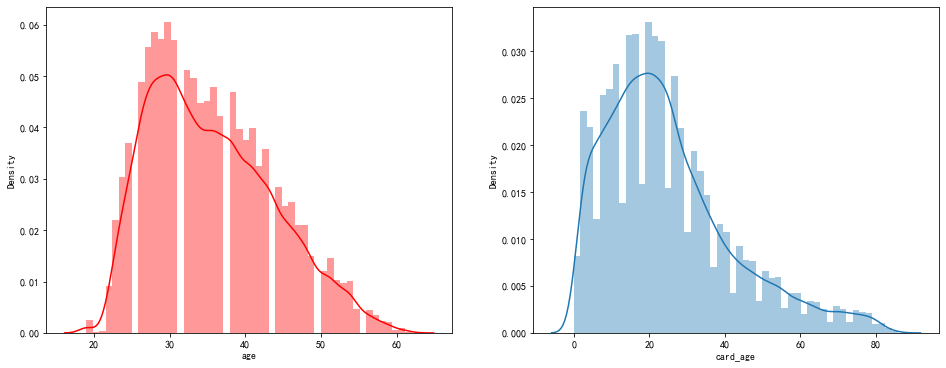

In [196]:
fig,[ax1,ax2] = plt.subplots(1,2,figsize=(16,6))
sns.distplot(data["age"],color="red",ax=ax1)
sns.distplot(data["card_age"],ax=ax2)
plt.show()

### 1.5 离散型特征检查与处理

#### 1.5.1 缺失值检查与处理

In [197]:
data = pd.read_table('dataset.txt',encoding='gbk',sep=' ',na_values=['None'])
na_counts = data.isnull().sum()
missing_value = na_counts[na_counts>0].sort_values(ascending=False)
print("缺失值")
print(missing_value)

缺失值
idVerify         25782
maritalStatus     7493
threeVerify       3494
education         3014
sex                163
Default              2
dtype: int64


In [198]:
data.fillna("未知", inplace = True) #用未知填充
data.drop(data.index[(data['Default'] == '未知')], inplace=True) #删除default中的缺失行
na_counts = data.isnull().sum()
missing_value = na_counts[na_counts>0].sort_values(ascending=False)
print(missing_value)
data.to_csv("dataset_new.txt", sep=' ',index=False)

Series([], dtype: int64)


#### 1.5.2 异常值检测与处理

In [199]:
data = pd.read_table('dataset_new.txt',sep=' ',na_values=['None'],low_memory=False)
print("异常值处理")
print(data['isCrime'].value_counts())
data['isCrime']= data['isCrime'].replace(2,data['isCrime'].mode()[0]) #众数替换
print(data['isCrime'].value_counts(),"\n")
# 分别打印其他离散型特征的取值，判断是否有异常值
label = ['Han', 'education', 'idVerify', 'inCourt', 'isBlackList',
        'isCrime', 'isDue', 'maritalStatus', 'netLength', 'sex', 'threeVerify', 'Default']
for _ in label:
    print(data[_].value_counts(),"\n")
data.to_csv("dataset_new2.txt", sep=' ',index=False)

异常值处理
0    46547
1      782
2        6
Name: isCrime, dtype: int64
0    46553
1      782
Name: isCrime, dtype: int64 

0    45516
1     1819
Name: Han, dtype: int64 

小学      18824
初中      13778
高中       8463
本科以上     3256
未知       3014
Name: education, dtype: int64 

未知     25780
不一致    13573
一致      7982
Name: idVerify, dtype: int64 

0    45551
1     1784
Name: inCourt, dtype: int64 

0    45565
1     1770
Name: isBlackList, dtype: int64 

0    46553
1      782
Name: isCrime, dtype: int64 

0    43855
1     3480
Name: isDue, dtype: int64 

未婚    24767
已婚    15075
未知     7493
Name: maritalStatus, dtype: int64 

24个月以上     28385
12-24个月     6917
无效          4866
6-12个月      3757
0-6个月       3410
Name: netLength, dtype: int64 

男     26530
女     20642
未知      163
Name: sex, dtype: int64 

一致     34511
不一致     9330
未知      3494
Name: threeVerify, dtype: int64 

0.0    43078
1.0     4257
Name: Default, dtype: int64 



### 1.6 连续型特征检查与处理

#### 1.6.1 网上消费金额异常值检测与处理 

In [200]:
data = pd.read_table('dataset_new2.txt',sep=' ',low_memory=False)
continuous_columns = ['age','cashTotalAmt','cashTotalCnt','monthCardLargeAmt','onlineTransAmt','onlineTransCnt','publicPayAmt','publicPayCnt','transTotalAmt','transTotalCnt','transCnt_non_null_months','transAmt_mean','transAmt_non_null_months','cashCnt_mean','cashCnt_non_null_months','cashAmt_mean','cashAmt_non_null_months','card_age']
# 查看数据各连续型特征的最小值
data_con_min = data[continuous_columns].min()
print(data_con_min)

age                               19.0
cashTotalAmt                       0.0
cashTotalCnt                       0.0
monthCardLargeAmt                  0.0
onlineTransAmt             -12676500.0
onlineTransCnt                     0.0
publicPayAmt                -6034950.0
publicPayCnt                       0.0
transTotalAmt                      0.0
transTotalCnt                      0.0
transCnt_non_null_months           0.0
transAmt_mean                      0.0
transAmt_non_null_months           0.0
cashCnt_mean                       0.0
cashCnt_non_null_months            0.0
cashAmt_mean                       0.0
cashAmt_non_null_months            0.0
card_age                           0.0
dtype: float64


In [201]:
online_trans = data[data['onlineTransAmt'] < 0][['onlineTransAmt','onlineTransCnt']]
print(online_trans.head())
# 从原始数据中筛选出网上消费金额大于2千万时，网上消费金额和网上消费笔数这两列
online_trans_large = data[data['onlineTransAmt'] > 2e7][['onlineTransAmt','onlineTransCnt']]
print(online_trans_large.head())
data.loc[data['onlineTransCnt'] == 0,'onlineTransAmt'] = 0
# 查看修正后网上消费笔数为0时，网上消费金额与网上消费笔数两列数据
online_after = data[data["onlineTransCnt"]  == 0 ][["onlineTransAmt","onlineTransCnt"]] 
print(online_after.head())
# 筛选出网上消费金额在2千万以下的数据样本,更新data
data = data[data['onlineTransAmt']<2e7]
print(data.head())
# 保存更新后的data到dataset_new3.txt
data.to_csv("dataset_new3.txt", sep=' ',index=False)

   onlineTransAmt  onlineTransCnt
0         -7710.0             2.0
2       -164560.0            39.0
4         -5260.0            15.0
5          -170.0            12.0
8        -55270.0            73.0
       onlineTransAmt  onlineTransCnt
6290     2.464593e+07           714.0
33444    2.286678e+07           713.0
    onlineTransAmt  onlineTransCnt
7              0.0             0.0
12             0.0             0.0
14             0.0             0.0
16             0.0             0.0
17             0.0             0.0
  CityId  Han   age  card_age  cashAmt_mean  cashAmt_non_null_months  \
0   一线城市    0  38.0         2           0.0                        0   
1   一线城市    0  39.0        19           0.0                        0   
2   二线城市    0  40.0        16           0.0                        0   
3     其它    0  38.0        13       22000.0                        1   
4   二线城市    0  24.0         8           0.0                        0   

   cashCnt_mean  cashCnt_non_null_month

#### 1.6.2 对连续特征值进行盒图可视化

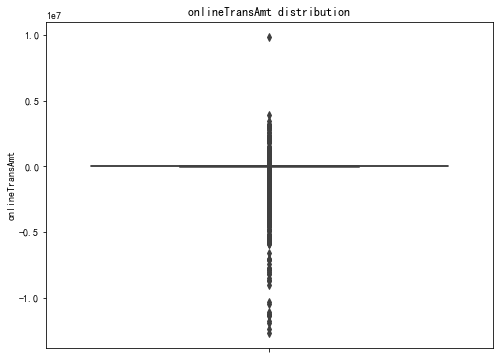

In [202]:
data = pd.read_table('dataset_new3.txt',sep=' ',low_memory=False)
fig,ax = plt.subplots(figsize=(8,6))
sns.boxplot(y=data['onlineTransAmt'],ax=ax)
plt.title('onlineTransAmt distribution')
plt.show()

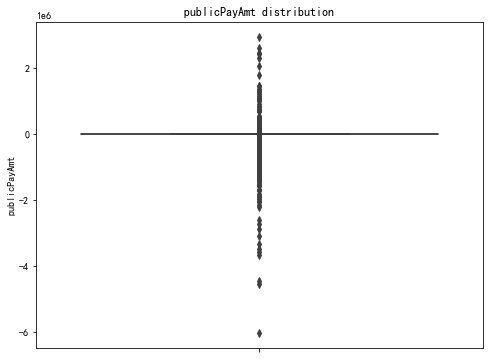

In [203]:
fig,ax = plt.subplots(figsize=(8,6))
sns.boxplot(y=data['publicPayAmt'],ax=ax)
plt.title('publicPayAmt distribution')
plt.show()

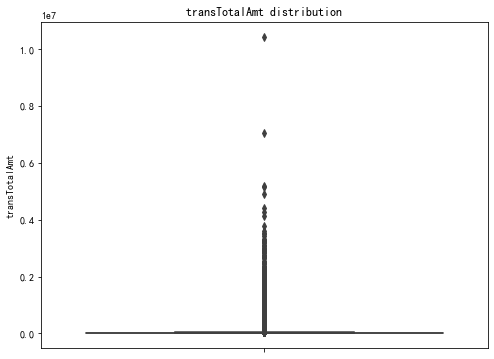

In [204]:
fig,ax = plt.subplots(figsize=(8,6))
sns.boxplot(y=data['transTotalAmt'],ax=ax)
plt.title('transTotalAmt distribution')
plt.show()

### 1.7 离散型特征编码

#### 1.7.1 将离散文字编码转为数字

In [205]:
data = pd.read_table('dataset_new3.txt',sep=' ',low_memory=False)
mapmap = {
    '未知':0,
    '未婚':1,
    '已婚':2,
    '小学':1,
    '初中':2,
    '高中':3,
    '本科以上':4,
    '一致':1,
    '不一致':2,
    '无效':0,
    '0-6个月':1,
    '6-12个月':2,
    '12-24个月':3,
    '24个月以上':4,
    '男':1,
    '女':2,
    '一线城市':1,
    '二线城市':2,
    '其它':3
    }
data["maritalStatus"] = data['maritalStatus'].map(lambda x: mapmap[x])
data['education'] = data['education'].map(lambda x: mapmap[x])
data['idVerify'] = data['idVerify'].map(lambda x: mapmap[x])
data['threeVerify'] = data['threeVerify'].map(lambda x: mapmap[x])
data["netLength"] = data["netLength"].map(lambda x: mapmap[x])
data["sex"] = data["sex"].map(lambda x: mapmap[x])
data["CityId"] = data["CityId"].map(lambda x: mapmap[x])
print(data.head())

   CityId  Han   age  card_age  cashAmt_mean  cashAmt_non_null_months  \
0       1    0  38.0         2           0.0                        0   
1       1    0  39.0        19           0.0                        0   
2       2    0  40.0        16           0.0                        0   
3       3    0  38.0        13       22000.0                        1   
4       2    0  24.0         8           0.0                        0   

   cashCnt_mean  cashCnt_non_null_months  cashTotalAmt  cashTotalCnt  \
0           0.0                        0             0             0   
1           0.0                        0             0             0   
2           0.0                        0             0             0   
3           6.0                        1         22000             6   
4           0.0                        0             0             0   

   education  idVerify  inCourt  isBlackList  isCrime  isDue  maritalStatus  \
0          1         2        0            0     

#### 1.7.2 对离散型变量One-Hot编码

In [206]:
data = pd.get_dummies(data=data,columns=['maritalStatus','education','idVerify',
                                         'threeVerify','Han','netLength','sex','CityId'])
print(data.columns)
data.to_csv("dataset_new4.txt", sep=' ',index=False)

Index(['age', 'card_age', 'cashAmt_mean', 'cashAmt_non_null_months',
       'cashCnt_mean', 'cashCnt_non_null_months', 'cashTotalAmt',
       'cashTotalCnt', 'inCourt', 'isBlackList', 'isCrime', 'isDue',
       'monthCardLargeAmt', 'noTransWeekPre', 'onlineTransAmt',
       'onlineTransCnt', 'publicPayAmt', 'publicPayCnt', 'transAmt_mean',
       'transAmt_non_null_months', 'transCnt_mean', 'transCnt_non_null_months',
       'transTotalAmt', 'transTotalCnt', 'Default', 'maritalStatus_0',
       'maritalStatus_1', 'maritalStatus_2', 'education_0', 'education_1',
       'education_2', 'education_3', 'education_4', 'idVerify_0', 'idVerify_1',
       'idVerify_2', 'threeVerify_0', 'threeVerify_1', 'threeVerify_2',
       'Han_0', 'Han_1', 'netLength_0', 'netLength_1', 'netLength_2',
       'netLength_3', 'netLength_4', 'sex_0', 'sex_1', 'sex_2', 'CityId_1',
       'CityId_2', 'CityId_3'],
      dtype='object')


### 1.8 给数据添加信用评估指标
   年消费总额 年取现总额 平均每笔取现金额 网上平均每笔消费额 公共事业平均每笔缴费额 不良记录

In [207]:
data = pd.read_table('dataset_new4.txt',sep=' ')
trans_total = data['transCnt_mean']*data['transAmt_mean']
total_withdraw = data['cashCnt_mean']*data['cashAmt_mean']
avg_per_withdraw = data['cashTotalAmt']/data['cashTotalCnt']
avg_per_online_spend = data['onlineTransAmt']/data['onlineTransCnt']
avg_per_public_spend = data['publicPayAmt']/data['publicPayCnt']
bad_record = data['inCourt']+data['isBlackList']+data['isCrime']+data['isDue']
data['trans_total'] = trans_total
data['total_withdraw'] = total_withdraw
data['avg_per_withdraw'] = avg_per_withdraw
data['avg_per_online_spend'] = avg_per_online_spend
data['avg_per_public_spend'] = avg_per_public_spend
data['bad_record'] = bad_record
data.fillna(0, inplace = True)
print(data.head(20))
data.to_csv("dataset_new5.txt", sep=' ',index=False)

     age  card_age  cashAmt_mean  cashAmt_non_null_months  cashCnt_mean  \
0   38.0         2      0.000000                        0      0.000000   
1   39.0        19      0.000000                        0      0.000000   
2   40.0        16      0.000000                        0      0.000000   
3   38.0        13  22000.000000                        1      6.000000   
4   24.0         8      0.000000                        0      0.000000   
5   22.0         9   2100.000000                        1      5.000000   
6   33.0        27   1800.000000                        5      3.200000   
7   27.0        51      0.000000                        0      0.000000   
8   27.0        47   1533.333333                        3      1.666667   
9   25.0        32      0.000000                        0      0.000000   
10  35.0        12    750.000000                        6      2.000000   
11  41.0         2      0.000000                        0      0.000000   
12  29.0        68    933

## 2. 构建风控模型

### 2.1 划分数据集并处理不平衡问题

In [208]:
import numpy as np
data = pd.read_table('dataset_new5.txt',sep=' ',low_memory=False).replace([np.inf,-np.inf],0)
from sklearn.model_selection import train_test_split
y = pd.to_numeric(data['Default'].values, downcast='signed')
x = data.drop(['Default'], axis=1).values
# 使用train_test_split方法，将x, y划分训练集和测试集
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,stratify=y)
len_x_train = len(x_train)
len_x_test = len(x_test)
print('x_train length: %d, x_test length: %d'%(len_x_train,len_x_test))
# 处理类别不平衡问题
import imblearn
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
x_resampled, y_resampled = ros.fit_resample(x, y)
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(x,y,test_size=0.2,stratify=y)

x_train length: 37866, x_test length: 9467


### 2.2 使用逻辑回归构建模型

In [209]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
# 构建LogisticRegression模型，带入训练集进行训练
lr = LogisticRegression(max_iter=1000000).fit(x_train,y_train)
y_predict_b = lr.predict(x_test)
y_predict = lr.predict_proba(x_test)[:,1]
test_acc = accuracy_score(y_test,y_predict_b)
test_auc = roc_auc_score(y_test,y_predict)
print('逻辑回归模型 test_acc:',test_acc)
print('逻辑回归模型 test_auc:',test_auc)
# 训练平衡类别的数据集
lr = LogisticRegression(max_iter=1000000).fit(x_train_new,y_train_new)
y_predict_b = lr.predict(x_test_new)
y_predict = lr.predict_proba(x_test_new)[:,1]
test_acc = accuracy_score(y_test_new,y_predict_b)
test_auc = roc_auc_score(y_test_new,y_predict)
print("类别平衡后")
print('逻辑回归模型 test_acc:',test_acc)
print('逻辑回归模型 test_auc:',test_auc)

逻辑回归模型 test_acc: 0.9339811978451463
逻辑回归模型 test_auc: 0.8443212802241506
类别平衡后
逻辑回归模型 test_acc: 0.9356712791803106
逻辑回归模型 test_auc: 0.8396806640720895


### 2.2 优化逻辑回归超参数

In [210]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
# LogisticRegression模型的参数（penalty/C/class_weight）调优
lr = LogisticRegression(C=0.5,class_weight='balanced',penalty='l1',solver='liblinear',max_iter=100000).fit(x_train,y_train)
y_predict_b = lr.predict(x_test)
y_predict = lr.predict_proba(x_test)[:,1]
test_acc = accuracy_score(y_test,y_predict_b)
test_auc = roc_auc_score(y_test,y_predict)
print('逻辑回归模型 test_acc:',test_acc)
print('逻辑回归模型 test_auc:',test_auc)

lr = LogisticRegression(C=0.5,class_weight='balanced',penalty='l2',max_iter=100000).fit(x_train,y_train)
y_predict_b = lr.predict(x_test)
y_predict = lr.predict_proba(x_test)[:,1]
test_acc = accuracy_score(y_test,y_predict_b)
test_auc = roc_auc_score(y_test,y_predict)
print('逻辑回归模型 test_acc:',test_acc)
print('逻辑回归模型 test_auc:',test_auc)

逻辑回归模型 test_acc: 0.8439843667476498
逻辑回归模型 test_auc: 0.8954361137205997
逻辑回归模型 test_acc: 0.7994084715326926
逻辑回归模型 test_auc: 0.8842118126361798


可见对逻辑回归进行超参数的提升不大，准确率有所下降泛用性有所上升。推测可能需要对数据本身进行再次处理，因此进行标准化和离散化。

### 2.3 数据标准化和离散化

In [211]:
data = pd.read_table('dataset_new5.txt',sep=' ',low_memory=False).replace([np.inf,-np.inf],0)
continuous_columns = ['age','cashTotalAmt','cashTotalCnt','monthCardLargeAmt','onlineTransAmt','onlineTransCnt','publicPayAmt','publicPayCnt','transTotalAmt','transTotalCnt','transCnt_non_null_months','transAmt_mean','transAmt_non_null_months','cashCnt_mean','cashCnt_non_null_months','cashAmt_mean','cashAmt_non_null_months','card_age', 'trans_total','total_withdraw', 'avg_per_withdraw','avg_per_online_spend', 'avg_per_public_spend', 'bad_record']
# 对data中所有连续型的列进行Z-score标准化
data[continuous_columns]=data[continuous_columns].apply(lambda x:(x-x.mean())/x.std())
# 查看标准化后的数据的均值和标准差
print("mean:",data.mean(),sep="\n")
print("std:",data.std(),sep="\n")
# 查看标准化后对模型的效果提升
y = data['Default'].values
x = data.drop(['Default'], axis=1).values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,stratify=y)
# LogisticRegression模型训练及测试评估
lr = LogisticRegression(max_iter=100000).fit(x_train,y_train)
y_predict_b = lr.predict(x_test)
y_predict = lr.predict_proba(x_test)[:,1]
test_acc = accuracy_score(y_test,y_predict_b)
test_auc = roc_auc_score(y_test,y_predict)
print('test_acc:',test_acc)
print('test_auc:',test_auc)

mean:
age                         3.362592e-16
card_age                   -3.842962e-17
cashAmt_mean               -3.722870e-17
cashAmt_non_null_months     5.284073e-17
cashCnt_mean                8.886851e-17
cashCnt_non_null_months    -1.921481e-17
cashTotalAmt               -1.200926e-17
cashTotalCnt                6.244814e-17
inCourt                     3.769041e-02
isBlackList                 3.739463e-02
isCrime                     1.652124e-02
isDue                       7.352164e-02
monthCardLargeAmt          -2.161666e-17
noTransWeekPre              6.898437e-01
onlineTransAmt              1.561203e-17
onlineTransCnt              2.041574e-17
publicPayAmt                5.254050e-18
publicPayCnt               -2.882222e-17
transAmt_mean               1.921481e-17
transAmt_non_null_months   -9.607406e-17
transCnt_mean               2.414646e+00
transCnt_non_null_months   -5.764444e-17
transTotalAmt              -2.401852e-17
transTotalCnt               2.882222e-17
Default   

In [212]:
data = pd.read_table('dataset_new5.txt',sep=' ',low_memory=False).replace([np.inf,-np.inf],0)
continuous_columns = ['age','cashTotalAmt','cashTotalCnt','monthCardLargeAmt','onlineTransAmt','onlineTransCnt','publicPayAmt','publicPayCnt','transTotalAmt','transTotalCnt','transCnt_non_null_months','transAmt_mean','transAmt_non_null_months','cashCnt_mean','cashCnt_non_null_months','cashAmt_mean','cashAmt_non_null_months','card_age', 'trans_total', 'total_withdraw', 'avg_per_withdraw','avg_per_online_spend', 'avg_per_public_spend', 'bad_record']
data[continuous_columns] = data[continuous_columns].apply(lambda x : pd.qcut(x,5,duplicates='drop'))
print(data.head())
# 保存更新后的data到dataset_new6.txt
data[continuous_columns] = data[continuous_columns].astype("object")
data.to_csv("dataset_new6.txt", sep=' ',index=False)
# 先对各离散组进行One-Hot处理，再进行划分与训练
data=pd.get_dummies(data)
y = data['Default'].values
x = data.drop(['Default'], axis=1).values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,stratify=y)
lr = LogisticRegression(max_iter=100000).fit(x_train,y_train)
y_predict_b = lr.predict(x_test)
y_predict = lr.predict_proba(x_test)[:,1]
test_acc = accuracy_score(y_test,y_predict_b)
test_auc = roc_auc_score(y_test,y_predict)
print('test_acc:',test_acc)
print('test_auc:',test_auc)


              age        card_age         cashAmt_mean  \
0    (37.0, 43.0]  (-0.001, 10.0]      (-0.001, 150.0]   
1    (37.0, 43.0]    (18.0, 25.0]      (-0.001, 150.0]   
2    (37.0, 43.0]    (10.0, 18.0]      (-0.001, 150.0]   
3    (37.0, 43.0]    (10.0, 18.0]  (2299.0, 72633.333]   
4  (18.999, 28.0]  (-0.001, 10.0]      (-0.001, 150.0]   

  cashAmt_non_null_months     cashCnt_mean cashCnt_non_null_months  \
0           (-0.001, 1.0]  (-0.001, 0.562]           (-0.001, 1.0]   
1           (-0.001, 1.0]  (-0.001, 0.562]           (-0.001, 1.0]   
2           (-0.001, 1.0]  (-0.001, 0.562]           (-0.001, 1.0]   
3           (-0.001, 1.0]    (2.0, 29.333]           (-0.001, 1.0]   
4           (-0.001, 1.0]  (-0.001, 0.562]           (-0.001, 1.0]   

         cashTotalAmt   cashTotalCnt  inCourt  isBlackList  isCrime  isDue  \
0    (-0.001, 1439.2]  (-0.001, 1.0]        0            0        0      0   
1    (-0.001, 1439.2]  (-0.001, 1.0]        0            0        0      0

### 2.4 随机森林模型训练

In [213]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
data = pd.read_table('dataset_new6.txt',sep=' ',low_memory=False)
data = pd.get_dummies(data) #convert str to num
y = data['Default'].values
x = data.drop(['Default'], axis=1).values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y)
# 构建RandomForestClassifier模型，带入训练集进行训练
rf_clf = RandomForestClassifier()
rf_clf.fit(x_train,y_train)
y_predict_b = rf_clf.predict(x_test)
y_predict = rf_clf.predict_proba(x_test)[:,1]
test_acc = accuracy_score(y_test,y_predict_b)
test_auc = roc_auc_score(y_test,y_predict)
print('随机森林模型 test_acc:',test_acc)
print('随机森林模型 test_auc:',test_auc)

随机森林模型 test_acc: 0.9779233125594169
随机森林模型 test_auc: 0.9391783466280861


### 2.5 随机森林超参数调优

#### 2.5.1 选取最优的决策树数目

In [214]:
scores_test=[]
estimators=[]
# 设置n_estimators每隔20取一个数值，计算不同取值时模型在测试样本的AUC值。
for i in range(20,301,20):
    estimators.append(i)
    rf = RandomForestClassifier(n_estimators=i, random_state=1)
    rf.fit(x_train,y_train)
    y_predict = rf.predict_proba(x_test)[:,1]
    scores_test.append(roc_auc_score(y_test,y_predict))
print("best auc=",max(scores_test))

best auc= 0.9416312885490552


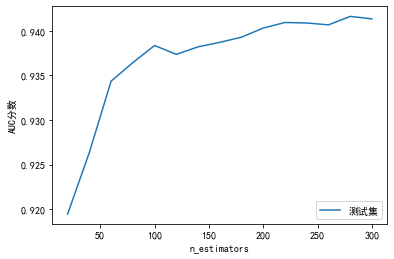

In [215]:
# 画出n_estimators与AUC的图形
fig,ax = plt.subplots()
ax.set_xlabel('n_estimators')
ax.set_ylabel('AUC分数')
plt.plot(estimators,scores_test, label='测试集')
plt.rcParams['font.sans-serif']=['SIMHEI'] 
plt.legend(loc="lower right")
plt.show()

#### 2.5.2 随机森林网格化搜索调优

In [216]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier()
# 构建随机森林模型，使用网格搜索进行训练及评估
tuned_parameters = {
    'n_estimators':[200,220,240],
    'max_depth':[6,8,10,12],
    'min_samples_split':[20,40,60]
}
rf_clf = GridSearchCV(rf,tuned_parameters,cv=5,n_jobs=-1,scoring='roc_auc')
rf_clf.fit(x_train, y_train)
print("最优参数",rf_clf.best_params_)
print("最好auc", rf_clf.best_score_)
y_predict_b = rf_clf.predict(x_test)
y_predict = rf_clf.predict_proba(x_test)[:,1]
test_acc = accuracy_score(y_test,y_predict_b)
test_auc = roc_auc_score(y_test,y_predict)
print ('随机森林 ACC',test_acc)
print ('随机森林 AUC',test_auc)

最优参数 {'max_depth': 12, 'min_samples_split': 20, 'n_estimators': 200}
最好auc 0.930858932690659
随机森林 ACC 0.9760219710573571
随机森林 AUC 0.9180025520251995


### 2.6 构建其他算法模型进行训练

#### 2.6.1 高斯贝叶斯分类器

In [217]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
y_predict_b = gnb.predict(x_test)
y_predict = gnb.predict_proba(x_test)[:,1]
test_acc = accuracy_score(y_test,y_predict_b)
test_auc = roc_auc_score(y_test,y_predict)
print ('高斯贝叶斯 ACC, AUC:')
print (test_acc,test_auc)

高斯贝叶斯 ACC, AUC:
0.7588465194887504 0.8659736701701096


#### 2.6.2 多项式SVM和高斯SVM

In [218]:
from sklearn.svm import SVC, NuSVC, LinearSVC
svm = SVC(kernel='poly', degree=3, coef0=0.2, probability=True)
svm.fit(x_train,y_train)
y_predict_b = svm.predict(x_test)
y_predict = svm.predict_proba(x_test)[:,1]
test_acc = accuracy_score(y_test,y_predict_b)
test_auc = roc_auc_score(y_test,y_predict)
print ('多项式SVM ACC, AUC:')
print (test_acc,test_auc)

多项式SVM ACC, AUC:
0.9688391253829091 0.9037597228450445


In [219]:
svm = NuSVC(kernel='rbf', gamma='scale', nu=0.1, probability=True)
svm.fit(x_train,y_train)
y_predict_b = svm.predict(x_test)
y_predict = svm.predict_proba(x_test)[:,1]
test_acc = accuracy_score(y_test,y_predict_b)
test_auc = roc_auc_score(y_test,y_predict)
print ('高斯SVM ACC, AUC:')
print (test_acc,test_auc)

高斯SVM ACC, AUC:
0.9711629872187599 0.899512780310891


#### 2.6.3 神经网络

In [220]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='adam', alpha=1e-5, max_iter = 100000)
clf.fit(x_train,y_train)
y_predict_b = clf.predict(x_test)
y_predict = clf.predict_proba(x_test)[:,1]
test_acc = accuracy_score(y_test,y_predict_b)
test_auc = roc_auc_score(y_test,y_predict)
print ('神经网络 ACC, AUC:')
print (test_acc,test_auc)

神经网络 ACC, AUC:
0.9665152635470582 0.9110841797350215


## 3. 风险评估模型分析

### 3.1 逻辑回归模型分析

In [221]:
from sklearn import metrics
data = pd.read_table('dataset_new6.txt',sep=' ')
data=pd.get_dummies(data)
y = data['Default'].values
x = data.drop(['Default'], axis=1).values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state = 33,stratify=y)
# 使用调优的参数训练逻辑回归模型
lr = LogisticRegression(max_iter=100000).fit(x_train,y_train)
y_predict = lr.predict_proba(x_test)[:,1]

#### 3.1.1 ROC-AUC 和 PR 曲线

auc= 0.9089651750575813


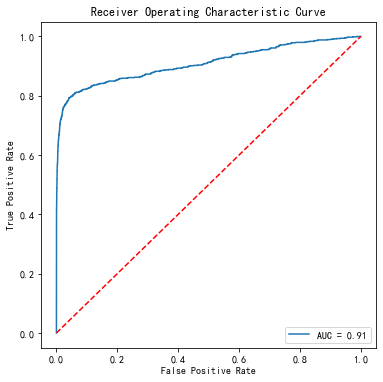

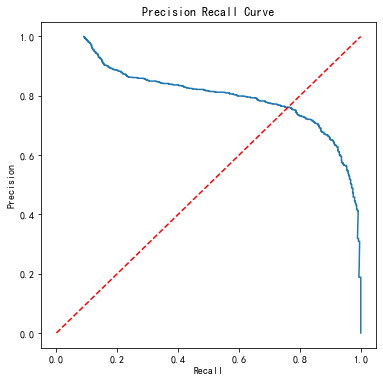

In [222]:
# 使用metrics.roc_curve()求出 fpr, tpr, threshold
fpr, tpr, threshold = metrics.roc_curve(y_test,y_predict)
pre, rec, threshold2 = metrics.precision_recall_curve(y_test,y_predict)
roc_auc = metrics.auc(fpr,tpr)
print("auc=",roc_auc)
# 绘制ROC曲线
fig,ax = plt.subplots(figsize=(6,6))
plt.plot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--') 
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.show()
# 绘制PR曲线
fig,ax = plt.subplots(figsize=(6,6))
plt.plot(pre, rec)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()

#### 3.1.2 KS检验

KS值： 75.17 % 阈值： 0.17


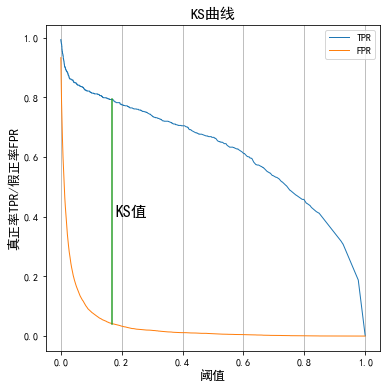

In [223]:
ks = max(abs(tpr-fpr))
thre = threshold[abs(tpr-fpr).argmax()]
ks = round(ks*100, 2)
thre = round(thre, 2)
print('KS值：', ks,  '%', '阈值：', thre)
fig,ax = plt.subplots(figsize=(6,6))
plt.plot(threshold[1:747], tpr[1:747], lw=1, alpha=1,label='TPR')
plt.plot(threshold[1:747], fpr[1:747], lw=1, alpha=1,label='FPR')
ks_tpr = tpr[abs(tpr-fpr).argmax()]
ks_fpr = fpr[abs(tpr-fpr).argmax()]
x1 = [thre, thre]
x2 = [ks_fpr, ks_tpr]
plt.plot(x1, x2)
plt.xlabel('阈值', fontsize=13)
plt.ylabel('真正率TPR/假正率FPR', fontsize=13)
plt.title('KS曲线', fontsize=15)
plt.legend(loc="upper right")
plt.grid(axis='x')
plt.annotate('KS值', xy=(0.1, 0.4), xytext=(0.18, 0.4),fontsize=16)
plt.rcParams['font.sans-serif']=['SimHei']
plt.show()

#### 3.1.3 模型稳定性PSI

psi= 0.0015027640408527892


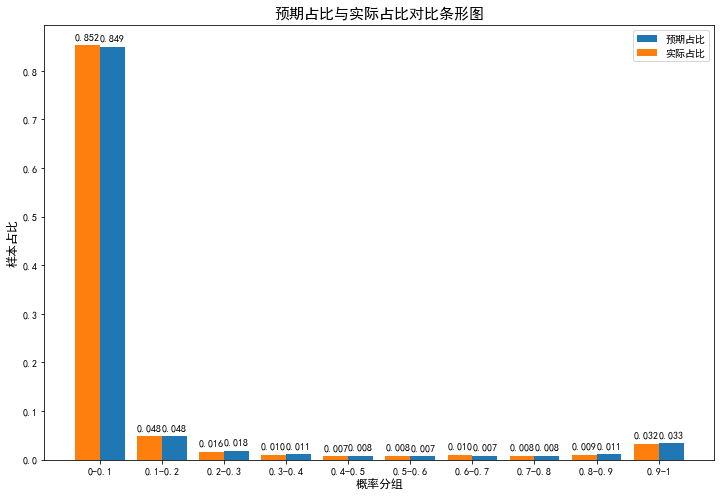

In [224]:
# 训练集预测概率
y_train_probs = lr.predict_proba(x_train)[:,1]
# 测试集预测概率
y_test_probs = y_predict
def psi(y_train_probs, y_test_probs):
    bins = np.arange(0, 1.1, 0.1)
    y_train_probs_cut = pd.cut(y_train_probs, bins=bins, labels=False)
    expect_prop = (pd.Series(y_train_probs_cut).value_counts()/len(y_train_probs)).sort_index()
    y_test_probs_cut = pd.cut(y_test_probs, bins=bins, labels=False)
    actual_prop = (pd.Series(y_test_probs_cut).value_counts()/len(y_test_probs)).sort_index()
    psi = ((actual_prop - expect_prop)*np.log(actual_prop/expect_prop)).sum()
    return psi, expect_prop, actual_prop
# 得到psi值、预期占比和实际占比
psi_index, expect_prop, actual_prop = psi(y_train_probs,y_test_probs)
print('psi=',psi_index)
fig = plt.figure(figsize=(12, 8))
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.bar(expect_prop.index + 0.2, expect_prop, width=0.4, label='预期占比')
plt.bar(actual_prop.index - 0.2, actual_prop, width=0.4, label='实际占比')
plt.legend()
plt.xlabel('概率分组', fontsize=12)
plt.ylabel('样本占比', fontsize=12)
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
           ['0-0.1', '0.1-0.2', '0.2-0.3', '0.3-0.4', '0.4-0.5', '0.5-0.6', '0.6-0.7', '0.7-0.8', '0.8-0.9', '0.9-1'])
plt.title('预期占比与实际占比对比条形图', fontsize=15)
for index, item1, item2 in zip(range(10), expect_prop.values, actual_prop.values): 
    plt.text(index+0.2, item1 + 0.01, '%.3f' % item1, ha="center", va= "bottom",fontsize=10)
    plt.text(index-0.2, item2 + 0.01, '%.3f' % item2, ha="center", va= "bottom",fontsize=10)
plt.show()

#### 3.1.4 模型指标重要性

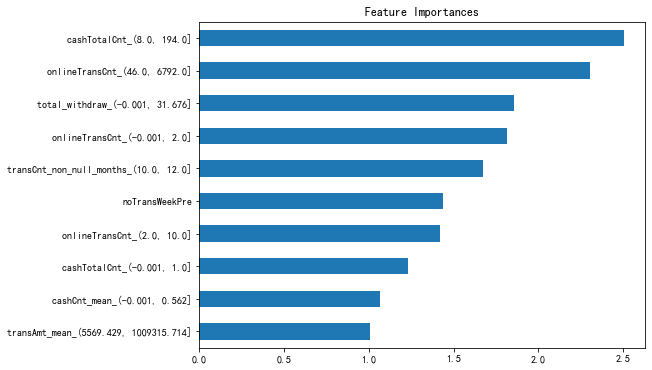

In [225]:
coefficient = lr.coef_
importance = abs(coefficient)
index=data.drop('Default', axis=1).columns
feature_importance = pd.DataFrame(importance.T, index=index).sort_values(by=0, ascending=True)
# print(feature_importance)
feature_importance.tail(10).plot(kind='barh', title='Feature Importances', figsize=(8, 6), legend=False)
plt.show()

### 3.2 随机森林模型分析

In [226]:
data = pd.read_table('dataset_new6.txt',sep=' ')
data=pd.get_dummies(data)
y = data['Default'].values
x = data.drop(['Default'], axis=1).values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state = 33,stratify=y)
# 使用调优的参数训练随机森林模型
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 220, criterion = 'entropy', max_depth = 12, min_samples_split = 20, random_state=12)
rf.fit(x_train, y_train)
y_predict = rf.predict_proba(x_test)[:,1]

#### 3.2.1 ROC-AUC 和 PR 曲线

auc= 0.9258510660351522


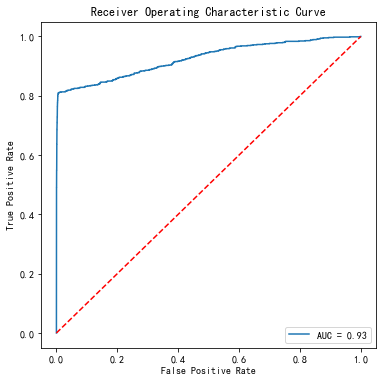

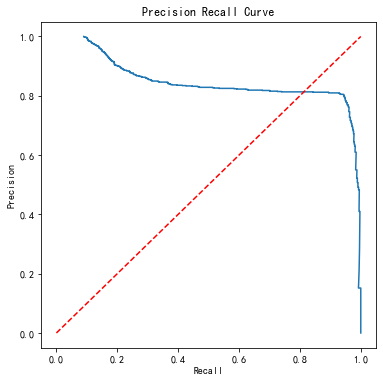

In [227]:
# 使用metrics.roc_curve()求出 fpr, tpr, threshold
fpr, tpr, threshold = metrics.roc_curve(y_test,y_predict)
pre, rec, threshold2 = metrics.precision_recall_curve(y_test,y_predict)
roc_auc = metrics.auc(fpr,tpr)
print("auc=",roc_auc)
# 绘制ROC曲线
fig,ax = plt.subplots(figsize=(6,6))
plt.plot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--') 
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.show()
# 绘制PR曲线
fig,ax = plt.subplots(figsize=(6,6))
plt.plot(pre, rec)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()

#### 3.2.2 KS检验

KS值： 80.35 % 阈值： 0.38


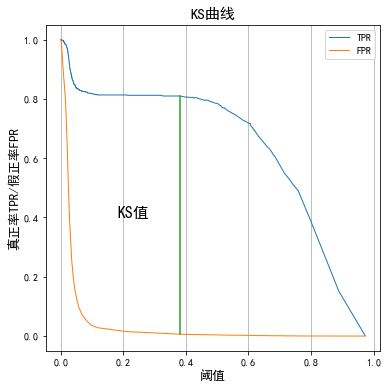

In [228]:
ks = max(abs(tpr-fpr))
thre = threshold[abs(tpr-fpr).argmax()]
ks = round(ks*100, 2)
thre = round(thre, 2)
print('KS值：', ks,  '%', '阈值：', thre)
fig,ax = plt.subplots(figsize=(6,6))
plt.plot(threshold[1:747], tpr[1:747], lw=1, alpha=1,label='TPR')
plt.plot(threshold[1:747], fpr[1:747], lw=1, alpha=1,label='FPR')
ks_tpr = tpr[abs(tpr-fpr).argmax()]
ks_fpr = fpr[abs(tpr-fpr).argmax()]
x1 = [thre, thre]
x2 = [ks_fpr, ks_tpr]
plt.plot(x1, x2)
plt.xlabel('阈值', fontsize=13)
plt.ylabel('真正率TPR/假正率FPR', fontsize=13)
plt.title('KS曲线', fontsize=15)
plt.legend(loc="upper right")
plt.grid(axis='x')
plt.annotate('KS值', xy=(0.1, 0.4), xytext=(0.18, 0.4),fontsize=16)
plt.rcParams['font.sans-serif']=['SimHei']
plt.show()

#### 3.2.3 模型稳定性PSI

psi= 0.005402093119638768


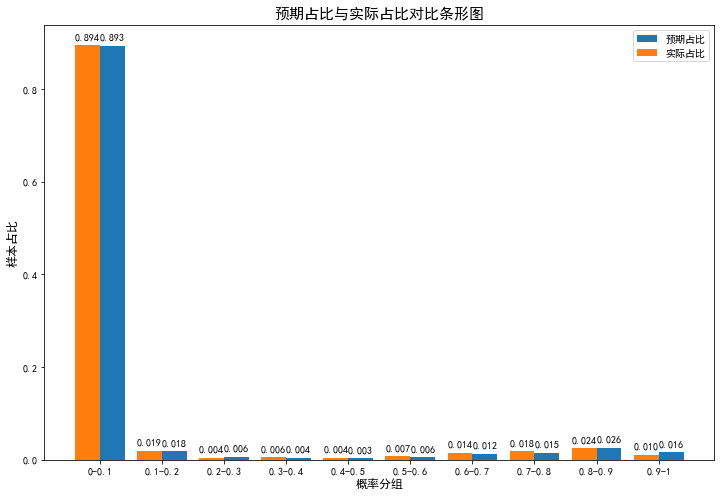

In [229]:
# 训练集预测概率
y_train_probs = rf.predict_proba(x_train)[:,1]
# 测试集预测概率
y_test_probs = y_predict
def psi(y_train_probs, y_test_probs):
    bins = np.arange(0, 1.1, 0.1)
    y_train_probs_cut = pd.cut(y_train_probs, bins=bins, labels=False)
    expect_prop = (pd.Series(y_train_probs_cut).value_counts()/len(y_train_probs)).sort_index()
    y_test_probs_cut = pd.cut(y_test_probs, bins=bins, labels=False)
    actual_prop = (pd.Series(y_test_probs_cut).value_counts()/len(y_test_probs)).sort_index()
    psi = ((actual_prop - expect_prop)*np.log(actual_prop/expect_prop)).sum()
    return psi, expect_prop, actual_prop
# 得到psi值、预期占比和实际占比
psi_index, expect_prop, actual_prop = psi(y_train_probs,y_test_probs)
print('psi=',psi_index)
fig = plt.figure(figsize=(12, 8))
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.bar(expect_prop.index + 0.2, expect_prop, width=0.4, label='预期占比')
plt.bar(actual_prop.index - 0.2, actual_prop, width=0.4, label='实际占比')
plt.legend()
plt.xlabel('概率分组', fontsize=12)
plt.ylabel('样本占比', fontsize=12)
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
           ['0-0.1', '0.1-0.2', '0.2-0.3', '0.3-0.4', '0.4-0.5', '0.5-0.6', '0.6-0.7', '0.7-0.8', '0.8-0.9', '0.9-1'])
plt.title('预期占比与实际占比对比条形图', fontsize=15)
for index, item1, item2 in zip(range(10), expect_prop.values, actual_prop.values): 
    plt.text(index+0.2, item1 + 0.01, '%.3f' % item1, ha="center", va= "bottom",fontsize=10)
    plt.text(index-0.2, item2 + 0.01, '%.3f' % item2, ha="center", va= "bottom",fontsize=10)
plt.show()

#### 3.2.4 模型指标重要性

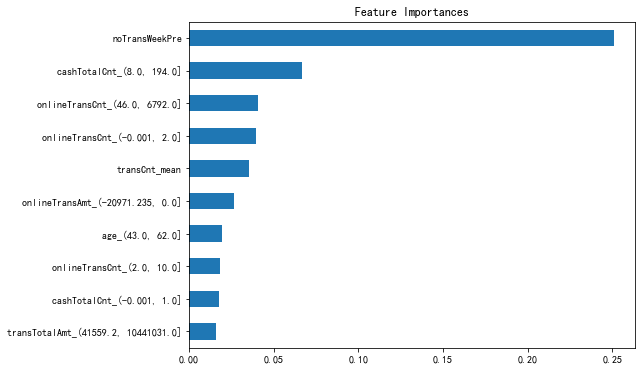

In [230]:
importance = rf.feature_importances_
index=data.drop('Default', axis=1).columns
feature_importance = pd.DataFrame(importance.T, index=index).sort_values(by=0, ascending=True)
# print(feature_importance)
feature_importance.tail(10).plot(kind='barh', title='Feature Importances', figsize=(8, 6), legend=False)
plt.show()

### 3.3 自定义SVM模型分析

In [231]:
def feature_show(y_predict, y_train_predict,y_test):
    fpr, tpr, threshold = metrics.roc_curve(y_test,y_predict)
    roc_auc = metrics.auc(fpr,tpr)
    print("roc_auc =",roc_auc)
    fig,ax = plt.subplots(figsize=(6,6))
    plt.plot(fpr, tpr)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.show()
    
    ks = max(abs(tpr-fpr))
    thre = threshold[abs(tpr-fpr).argmax()]
    ks = round(ks*100, 2)
    thre = round(thre, 2)
    print('KS值：', ks,  '%', '阈值：', thre)
    fig,ax = plt.subplots(figsize=(6,6))
    plt.plot(threshold[1:747], tpr[1:747], lw=1, alpha=1,label='TPR')
    plt.plot(threshold[1:747], fpr[1:747], lw=1, alpha=1,label='FPR')
    ks_tpr = tpr[abs(tpr-fpr).argmax()]
    ks_fpr = fpr[abs(tpr-fpr).argmax()]
    x1 = [thre, thre]
    x2 = [ks_fpr, ks_tpr]
    plt.plot(x1, x2, lw=1, alpha=1,label='KS')
    plt.xlabel('阈值', fontsize=13)
    plt.ylabel('真正率TPR/假正率FPR', fontsize=13)
    plt.title('KS曲线', fontsize=15)
    plt.legend(loc="upper right")
    plt.grid(axis='x')
    plt.rcParams['font.sans-serif']=['SimHei']
    plt.show()
    
    y_test_probs = y_predict
    def psi(y_train_probs, y_test_probs):
        bins = np.arange(0, 1.1, 0.1)
        y_train_probs_cut = pd.cut(y_train_probs, bins=bins, labels=False)
        expect_prop = (pd.Series(y_train_probs_cut).value_counts()/len(y_train_probs)).sort_index()
        y_test_probs_cut = pd.cut(y_test_probs, bins=bins, labels=False)
        actual_prop = (pd.Series(y_test_probs_cut).value_counts()/len(y_test_probs)).sort_index()
        psi = ((actual_prop - expect_prop)*np.log(actual_prop/expect_prop)).sum()
        return psi, expect_prop, actual_prop
    psi_index, expect_prop, actual_prop = psi(y_train_probs,y_test_probs)
    print('psi=',psi_index)
    fig = plt.figure(figsize=(12, 8))
    psi,expect_prob,actual_prob = psi(y_train_probs, y_test_probs)
    plt.rcParams['font.sans-serif'] = ['SimHei'] 
    plt.bar(expect_prop.index + 0.2, expect_prop, width=0.4, label='预期占比')
    plt.bar(actual_prop.index - 0.2, actual_prop, width=0.4, label='实际占比')
    plt.legend()
    plt.xlabel('概率分组', fontsize=12)
    plt.ylabel('样本占比', fontsize=12)
    plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
               ['0-0.1', '0.1-0.2', '0.2-0.3', '0.3-0.4', '0.4-0.5', '0.5-0.6', '0.6-0.7', '0.7-0.8', '0.8-0.9', '0.9-1'])
    plt.title('预期占比与实际占比对比条形图', fontsize=15)
    for index, item1, item2 in zip(range(10), expect_prop.values, actual_prop.values): 
        plt.text(index+0.2, item1 + 0.01, '%.3f' % item1, ha="center", va= "bottom",fontsize=10)
        plt.text(index-0.2, item2 + 0.01, '%.3f' % item2, ha="center", va= "bottom",fontsize=10)
    plt.show()

In [232]:
from sklearn.svm import SVC, NuSVC, LinearSVC
data = pd.read_table('dataset_new6.txt',sep=' ')
data=pd.get_dummies(data)
y = data['Default'].values
x = data.drop(['Default'], axis=1).values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state = 33,stratify=y)
svm = NuSVC(kernel='rbf', gamma='scale', nu=0.1, probability=True)
svm.fit(x_train,y_train)

NuSVC(nu=0.1, probability=True)

roc_auc = 0.9076418370653565


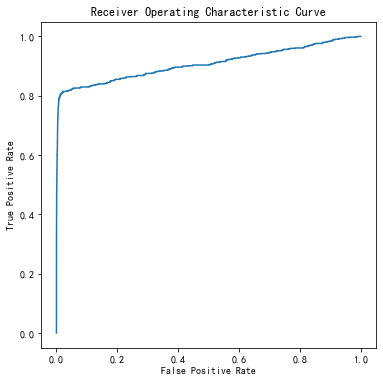

KS值： 79.3 % 阈值： 0.12


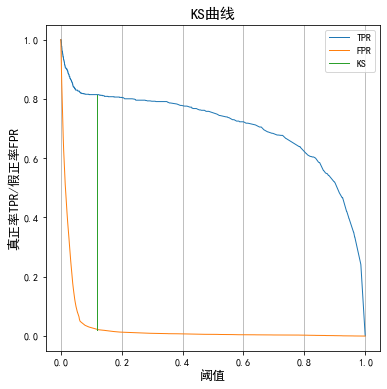

psi= 0.06875526962630862


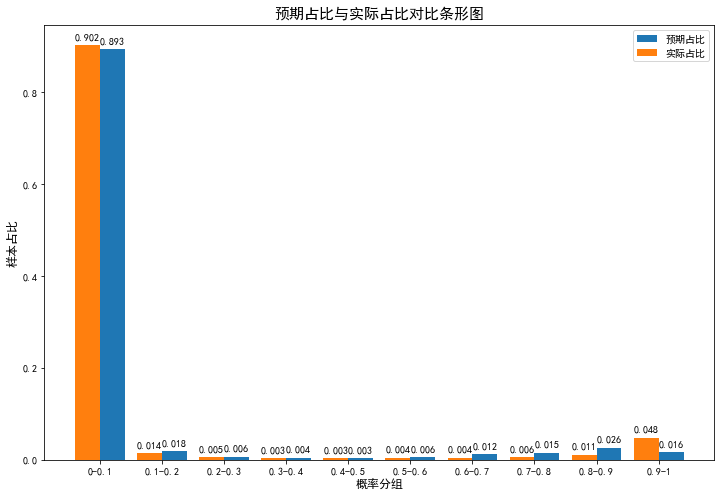

In [233]:
y_predict = svm.predict_proba(x_test)[:,1]
y_train_predict = svm.predict_proba(x_train)[:,1]
feature_show(y_predict,y_train_predict,y_test)

### 3.4 指标重要度综合排序

#### 3.4.1 获得逻辑回归和随机森林两个模型的指标重要度

In [234]:
coefficient = lr.coef_
importance = abs(coefficient)
index=data.drop('Default', axis=1).columns
lr_feature_importance = pd.DataFrame(importance.T, index=index)
importance = rf.feature_importances_
index=data.drop('Default', axis=1).columns
rf_feature_importance = pd.DataFrame(importance.T, index=index)

#### 3.4.2 对两个指标进行均值方差归一化后排序

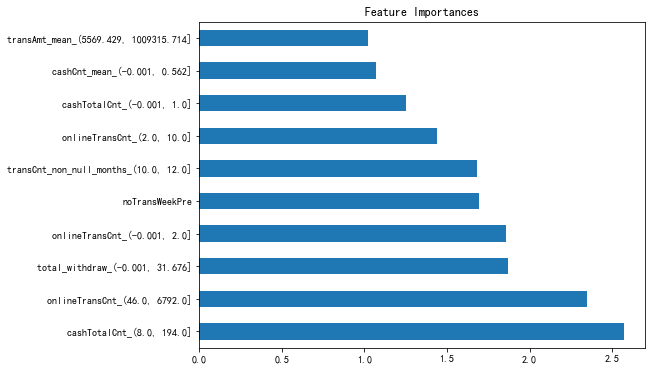

In [235]:
from sklearn import preprocessing
zscore = preprocessing.StandardScaler()
lr_fi_zs = zscore.fit_transform(lr_feature_importance)
lr_fi_zs = pd.DataFrame(lr_fi_zs, index=index)
rf_fi_zs = zscore.fit_transform(rf_feature_importance)
rf_fi_zs = pd.DataFrame(rf_fi_zs, index=index)
Feat_i = lr_feature_importance + rf_feature_importance
# print(Feat_i.sort_values(by = 0,ascending = False).head(10))
Feat_i.sort_values(by = 0,ascending = False).head(10).plot(kind='barh', title='Feature Importances', figsize=(8, 6), legend=False)
plt.show()

#### 3.4.3 对两个指标进行线性归一化后排序

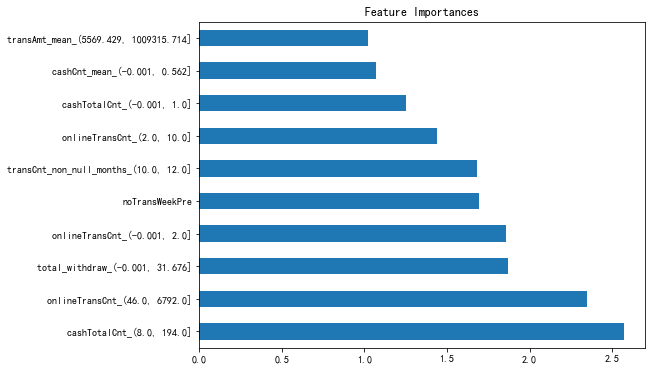

In [236]:
from sklearn import preprocessing
minmax = preprocessing.MinMaxScaler(feature_range=(0, 1))
lr_fi_zs = minmax.fit_transform(lr_feature_importance)
lr_fi_zs = pd.DataFrame(lr_fi_zs, index=index)
rf_fi_zs = minmax.fit_transform(rf_feature_importance)
rf_fi_zs = pd.DataFrame(rf_fi_zs, index=index)
Feat_i = lr_feature_importance + rf_feature_importance
# print(Feat_i.sort_values(by = 0,ascending = False).head(10))
Feat_i.sort_values(by = 0,ascending = False).head(10).plot(kind='barh', title='Feature Importances', figsize=(8, 6), legend=False)
plt.show()